In [18]:
import os
import osmnx as ox
import pickle

%reload_ext dotenv
%dotenv -o

CITY_NAME = os.environ["CITY_NAME"]
CITY_SLUG = os.environ["CITY_SLUG"]
print(f"City name: {CITY_NAME}")
print(f"City slug: {CITY_SLUG}")

City name: Piedmont, California, USA
City slug: piedmont_ca


In [22]:
# ~30 sec for Cambridge, MA, custom_filter=["highway"~"footway"]
G = ox.graph_from_place(
    CITY_NAME,
    simplify=True,
    network_type="drive",
    # custom_filter='["highway"~"footway"]'
)

In [23]:
print(f"Graph has:")
print(f"  {G.number_of_nodes():,} nodes")
print(f"  {G.number_of_edges():,} edges")

Graph has:
  353 nodes
  948 edges


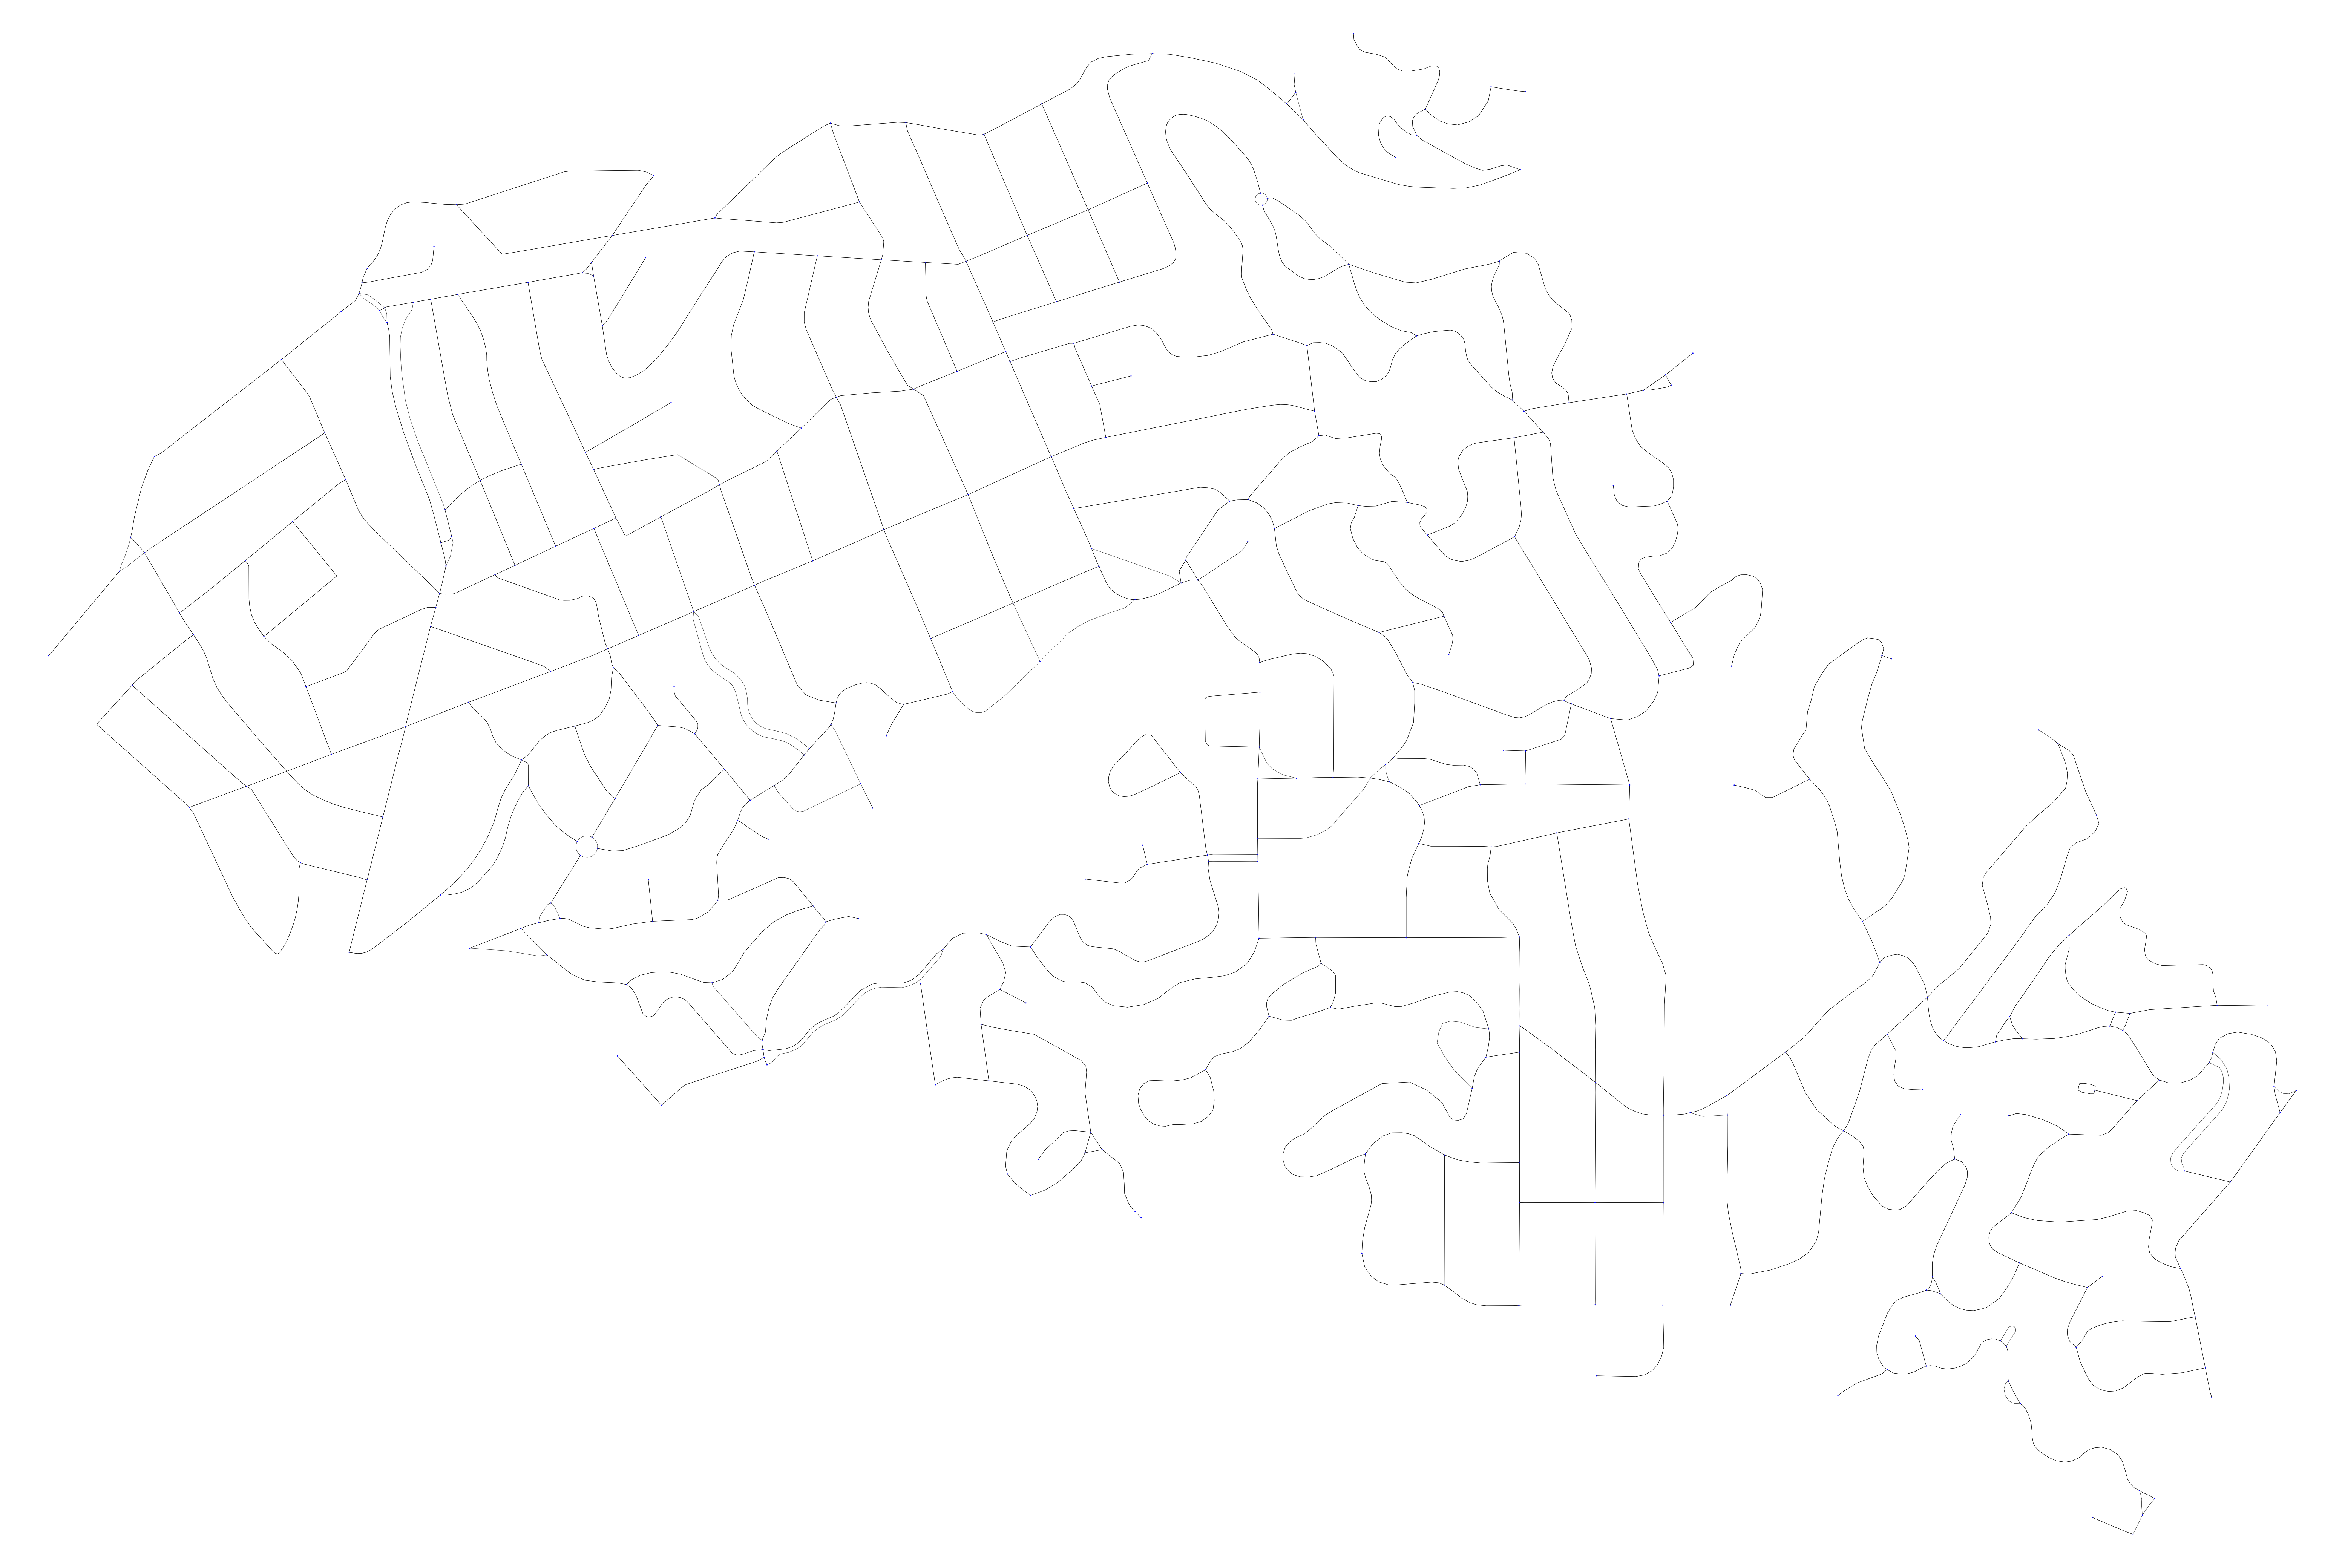

In [24]:
# ~30 sec?
# https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.plot.plot_graph
fig, ax = ox.plot_graph(
    G,
    figsize=(80, 80),
    bgcolor="#fff", edge_color="#000", node_color="#00f",
    node_size=5, edge_linewidth=0.5
)

In [15]:
# ~5 sec
with open(f"./data/{CITY_SLUG}_networkx_graph.pkl", "wb") as fout:
    pickle.dump(G, fout)

In [16]:
# ~15 sec
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
61182955,42.385184,-71.116133,traffic_signals,4,POINT (-71.11613 42.38518)
61283119,42.355899,-71.109581,NaN,4,POINT (-71.10958 42.35590)
61283126,42.356645,-71.108794,NaN,4,POINT (-71.10879 42.35665)
61283218,42.355993,-71.103318,NaN,3,POINT (-71.10332 42.35599)
61283269,42.360151,-71.094885,traffic_signals,4,POINT (-71.09488 42.36015)


In [17]:
gdf_nodes.to_csv(f"./data/{CITY_SLUG}_network_nodes.csv")
gdf_edges.to_csv(f"./data/{CITY_SLUG}_network_edges.csv")